<a href="https://colab.research.google.com/github/kmrakovcic/FoP_ML_workshop23/blob/master/03_deep_learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine learning

What is machine learning?

Machine learning is an umbrella term for all areas of study which give a computer the ability to learn to solve problems without being explicitly programmed. One of the modern definitions of machine learning developed by T. Mitchell is:


> **A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance of tasks in T, as measured by P, improves with experience E.**

In addition, a well-defined machine learning problem has identified three attributes: task T, performance measure P which is to be improved, and an origin of experience E.

For example, a computer program that is learning to play chess is improving its performance P which is measured by its ability to win at a task T, which is playing chess, through experience E obtained by playing against humans.

Machine learning has the benefit over traditional programming in that it can learn to solve problems without being explicitly programmed to do so. This is beneficial in problems that aren't completely described, i.e., it's not known ahead of time where the program will end up.

There are 3 main concepts that are usually used interchangeably, however, there are some differences:
* **Artificial intelligence** (AI): aims at building systems that simulate intelligence behaviour
* **Machine learning** (ML): a subset of AI that learns to make decisions by fitting mathematical models to data.
* **Deep Learning** (DL): machine learning algorithms that make use of neural networks.

In regards to experience E from the definition machine learning can be divided into three categories:
* supervised
* unsupervised
* reinforced

**Supervised learning** algorithms are referred to the learning in which the algorithm is trying to learn the data that is given and prepared beforehand. Usually given the data $x$ with a $n$ number of features, the algorithm is trying to assess the labels $y$, which are already known. Concretely, given the pairs $(x,y)$ in which the $y$ variable is dependent on $x$, the algorithm is trying to find mapping $f:x \rightarrow y$, usually $f(x) \approx y$, where $f(x)$ is best describing the labels $y$. If the $y$ is a continuous variable, then the process of learning is called regression, and if the $y$ is a discreet variable it is usually referred to it as a classification.

**Unsupervised learning** is usually used in cases when the dependent variable $y$ is not known. In this formulation of machine learning, from measured data $\{x_i\}$ algorithm is searching for a structure, grouping or some other mutual connection between data. This type of machine learning, also known as clustering, is trying to learn the whole probability distribution that generated measured data, either explicitly via density estimation, or implicitly via tasks of denoising. Those algorithms are capable of solving clustering problems, where the task is to find some kind of clusters in the data.

**Reinforced learning** is a case of learning where the algorithm is interacting with its environment and adjusting its behaviour to achieve a goal. Such learning is complicated but is mostly based on the principle of reward and punishment, where algorithms respond to information obtained from the environment and then optimize their behaviour in relation to the reward or punishment given by either the observer or the environment itself. Reinforcement learning is useful in cases where partial or local information about the system is available. However, due to the nature of the problem for which it is mainly used, such a method is not often found in physics.

##Data
The most important part of any machine learning algorithm is the data.

The whole dataset that is collected is separated into 3 subsets which are as follows:
* Training set
* Validation set
* Test set

The usual way is to split the whole dataset into a 70% training set, 15% validation set and 15% test set. Data in all three sets must be separated in a way that all sets are good representations of the whole dataset.

**Training set** is the most important part of the dataset. This set comprises the data that will initially be used to train the model. In other words, it helps teach the algorithm what to look for in the data.

**Validation set** is usually about a 15% subset of the total dataset and is used to evaluate all the parameters of the model after the training phase is complete. The validation data is known data that helps in identifying any shortcomings in the model. This data is also used to identify if the model is over/underfitting.

**Test set** is input at the final stage of the training process. The data in this subset is unknown to the model and is used to test the accuracy of the model. In simpler words, this dataset will show how much your model has learned.

**You should never let the model see the test set before final evaluation!**

Your model will acquire the biases in your data. Can be good or bad depending on the situation. If you care about outliers or regions with few examples, think about how to train your model.

Machine learning algorithms will work well if tested on data similar to the one used for training. Machine learning algorithms usually don't extrapolate well.

##Neural networks

Many problems in machine learning can be seen as optimization problems. However what function to choose to optimize?

[Universal approximation theorems](https://en.wikipedia.org/wiki/Universal_approximation_theorem) imply that *neural networks* can represent a wide variety of interesting functions when given appropriate weights.

Therefore neural networks are a good approximation for any unknown function we are trying to optimize.

What is a neural network? [video lecture](https://www.youtube.com/watch?v=aircAruvnKk) or in [written form](https://www.3blue1brown.com/lessons/neural-networks)

#Exercise 1
Create neural network from the video that inputs random data. Activation of the n-th layer is:
$$a^{(n)} = \sigma^{(n)}(W^{(n-1,n)} \cdot a^{(n-1)}+b^{(n)})$$

In [13]:
import numpy as np
#create sigmoid function to be activation function for layers
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
# creating random weigths
w0 = np.random.rand(784, 16)*2-1
w1 = np.random.rand(16, 16)*2-1
w2 = np.random.rand(16, 10)*2-1

# creating random biases
b0 = np.random.rand(16)*2-1
b1 = np.random.rand(16)*2-1
b2 = np.random.rand(10)*2-1

# creating random input layer vector
input_layer = np.random.rand(784)

In [15]:
# calculate first hidden layer
a1 = sigmoid(np.dot(input_layer, w0) + b0)
# calculate second hidden layer
a2 = sigmoid(np.dot(a1, w1) + b1)
# calculate output layer
output_layer = sigmoid(np.dot(a2, w2) + b2)

In [16]:
print (output_layer)

[0.12095226 0.11619382 0.55806272 0.23330173 0.60617395 0.97658422
 0.10022014 0.03302248 0.36803093 0.98344838]


In [17]:
print ("Predicted number is:", np.argmax(output_layer))

Predicted number is: 9


#Exercise 2
Read MNIST dataset of handwritten digits and prepare the data to be used by neural network.

Let's read mnist handwritten digits from disk.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Read comma separated files that contain train and test set from disk to pandas dataframe
mnist_train_df = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
mnist_test_df = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)
mnist_train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As you can see the first 784 rows are values of the pixels, however last row is the "label" of each image.

In [19]:
# Convert pandas dataframe to numpy array, and separate pixel values from labels
mnist_train_x = mnist_train_df.to_numpy()[:, 1:]
mnist_train_y = mnist_train_df.to_numpy()[:, 0]

mnist_test_x = mnist_test_df.to_numpy()[:, 1:]
mnist_test_y = mnist_test_df.to_numpy()[:, 0]

print ("Train set shape:", mnist_train_x.shape, mnist_train_y.shape)
print ("Test set shape:", mnist_test_x.shape, mnist_test_y.shape)

Train set shape: (20000, 784) (20000,)
Test set shape: (10000, 784) (10000,)


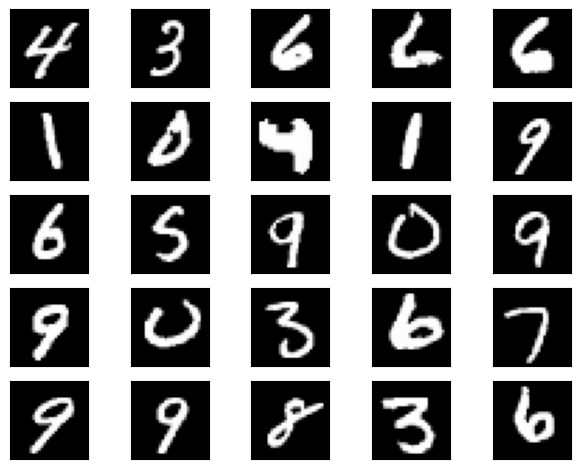

In [20]:
# Let's show some images from test set
fig, ax = plt.subplots(5,5)
img_index = np.random.randint(0, high=mnist_train_x.shape[0], size=ax.shape)
for i in range(img_index.shape[0]):
    for j in range(img_index.shape[1]):
        test = mnist_train_x[img_index[i,j]].reshape([int(np.sqrt(mnist_train_x.shape[-1])), -1])
        ax[i, j].imshow(test, cmap='Greys_r')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
fig.tight_layout()

##Sidenote
The labels in the train and test set are just numbers from 0-9, however, the output of our network will be a 9-neuron vector where the maximum value will be the network prediction of the number. Therefore we must convert the y labels from the numbers to the 9-dimensional vector in which all the values are 0 except the one neuron corresponding to the true value of the number, which must be one. This is called [one-hot encoding](https://en.wikipedia.org/wiki/One-hot).

In [21]:
print (np.unique(mnist_test_y))

[0 1 2 3 4 5 6 7 8 9]


In [22]:
def one_hot_encode(label):
    # one hot encoding so we can compare output layer and labels
    num_classes = 10
    one_hot = np.zeros((num_classes, label.shape[0]))
    # create
    one_hot [label, range(label.shape[0])] = 1
    return one_hot.T

#Problem 1
Create a neural network using a `class` to predict all the labels from the test MNIST dataset images. The number of neurons in each layer must be an input to the class, and the activation function at each layer is a sigmoid function. All the images must be evaluated at the same time as a tensor.

A suggestion is to create random weights and biases of appropriate size at class initialization, using attributes. Calculating the output layer can be one method and getting predictions from output layers can be another method.

Calculate randomly initiated network accuracy of predicting labels. Choose the number of neurons in each layer.

In [23]:
#@title My solution
# Add code here

In [24]:
#@title Solution
import numpy as np

class NeuralNetwork:

    def __init__(self, layer_sizes):
        #defining sizes of the weights and biases for each layer
        self.layer_sizes = layer_sizes
        self.weights = [np.random.rand(x, y)*2-1 for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.rand(x)*2-1 for x in layer_sizes[1:]]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def feedforward(self, a):
        #forward propagation to get activations on the neurons on the output layer
        for i in range(len(self.layer_sizes)-1):
            a = self.sigmoid(np.dot(a, self.weights[i]) + self.biases[i])
        return a

    def get_prediction(self, output):
        return np.argmax(output, axis=-1)

network = NeuralNetwork ([mnist_test_x.shape[1],16,16,10])
output_layer = network.feedforward(mnist_test_x)
predictions =  network.get_prediction(output_layer)
accuracy = (predictions == mnist_test_y).sum()/mnist_test_y.shape[0]
print ("Accuracy is:", accuracy)

Accuracy is: 0.0965


<ipython-input-24-f8e45fba6559>:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
